In [1]:
import joblib
import h5py
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
sns.set()


def set_raw_data_paths():
    pth={}
    pth["base_path_inh"] = "/Users/fahimehb/Documents/git-workspace/coupledAE-patchseq/data/experiment/PSv1_inh/"
    pth['best_summary_inh'] = pth["base_path_inh"] + 'cplTE_aT_1-0_aE_1-0_cs_1-0_ad_1_ld_3_bs_200_se_10_ne_1500_cv_0_ri_0_best_loss-summary.mat'
    pth['annotation_inh'] = "/Users/fahimehb/Documents/git-workspace/coupledAE-patchseq/data/proc/inh_T_annotations.csv"
    pth['inputmat_inh'] = "/Users/fahimehb/Documents/git-workspace/coupledAE-patchseq/data/proc/inh_model_input_mat.mat"
    
    pth["base_path_exc"] = "/Users/fahimehb/Documents/git-workspace/coupledAE-patchseq/data/experiment/PSv1_exc/"
    pth['best_summary_exc'] = pth["base_path_exc"] + 'cplTE_aT_1-0_aE_1-0_cs_1-0_ad_1_ld_3_bs_200_se_10_ne_1500_cv_0_ri_0_best_loss-summary.mat'
    pth['annotation_exc'] = "/Users/fahimehb/Documents/git-workspace/coupledAE-patchseq/data/proc/exc_T_annotations.csv"
    pth['inputmat_exc'] = "/Users/fahimehb/Documents/git-workspace/coupledAE-patchseq/data/proc/exc_model_input_mat.mat"
    return pth

# Datasets overview

In [2]:
pth = set_raw_data_paths()
best_summary_inh = sio.loadmat(pth['best_summary_inh'])
anno_inh = pd.read_csv(pth['annotation_inh'])

best_summary_exc = sio.loadmat(pth['best_summary_exc'])
anno_exc = pd.read_csv(pth['annotation_exc'])

In [3]:
print("Total number of cells with both T and E properties in inh dataset:")
all_ind_inh = best_summary_inh['train_ind'][0].tolist() + best_summary_inh['val_ind'][0].tolist()
print(len(all_ind_inh))
print()
print("===============================")
print()
print("Total number of cells with both T and E properties in exc dataset:")
all_ind_exc = best_summary_exc['train_ind'][0].tolist() + best_summary_exc['val_ind'][0].tolist()
print(len(all_ind_exc))

Total number of cells with both T and E properties in inh dataset:
3793


Total number of cells with both T and E properties in exc dataset:
1599


# Train and validation loss

In [4]:
base_path = pth['base_path_inh']
logs_inh = pd.read_csv(base_path + "/logs/cplTE_aT_1-0_aE_1-0_cs_1-0_ad_1_ld_3_bs_200_se_10_ne_1500_cv_0_ri_0.csv")

base_path = pth['base_path_exc']
logs_exc = pd.read_csv(base_path + "/logs/cplTE_aT_1-0_aE_1-0_cs_1-0_ad_1_ld_3_bs_200_se_10_ne_1500_cv_0_ri_0.csv")
logs_exc.head() 

,train_epoch,train_mse_T,train_mse_E,train_mse_TE,val_epoch,val_mse_T,val_mse_E,val_mse_TE
0,1,9.900157,0.10272621,1.578364,1,9.672808,0.11774402,1.9067451
1,2,9.321478,0.10253115,1.1796654,2,9.098446,0.11752201,1.3536185
2,3,7.688242,0.10212315,1.2704618,3,7.4992,0.11710914,1.5606754
3,4,4.9100676,0.101294905,1.1237502,4,4.819224,0.11602113,1.4241929
4,5,4.0281067,0.09930843,1.1065464,5,4.051874,0.11377108,1.3688347


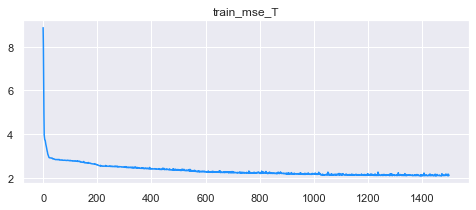

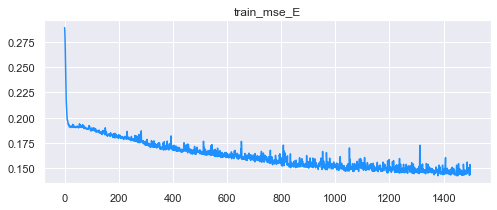

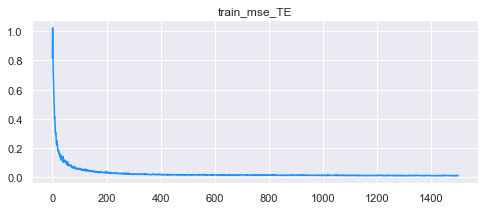

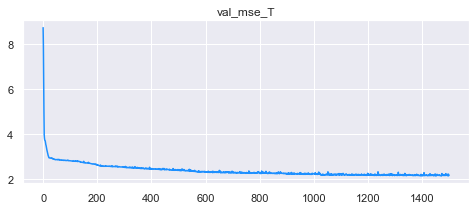

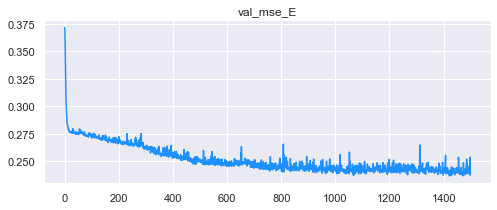

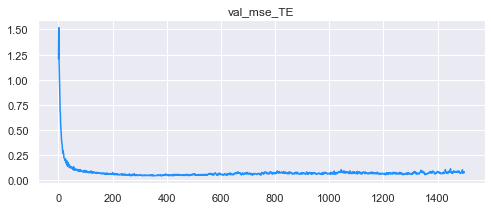

In [5]:
for loss in ["train_mse_T", "train_mse_E", "train_mse_TE",
            "val_mse_T", "val_mse_E", "val_mse_TE"]:
        plt.figure(figsize=(8,3))
        plt.subplot(1,1,1)
        plt.plot(logs_inh[loss],color='dodgerblue')
        plt.title(loss)
        

## Comparing the embeddings in each arm

In [23]:
inputmat = sio.loadmat(pth['inputmat_inh'])
all_ind = all_ind_inh
best_summary = best_summary_inh
anno = anno_inh

In [29]:
inputmat = sio.loadmat(pth['inputmat_exc'])
all_ind = all_ind_exc
best_summary = best_summary_exc
anno = anno_exc

In [30]:
sample_ids = [i[0] for i in inputmat['sample_id'][0].tolist()]
sample_ids = [sample_ids[index] for index in all_ind]
zE = pd.DataFrame(best_summary['zE'], columns=["zE" + str(i) for i in range(best_summary['zE'].shape[1])])
zT = pd.DataFrame(best_summary['zT'], columns=["zT" + str(i) for i in range(best_summary['zT'].shape[1])])
results = pd.concat([zE, zT], axis=1)
results['sample_id'] = sample_ids
results = results.merge(anno, on="sample_id")

In [25]:
np.unique(results.Tree_first_cl_label)

array(['Lamp5 Fam19a1 Tmem182', 'Lamp5 Lhx6', 'Lamp5 Lsp1',
       'Lamp5 Ntn1 Npy2r', 'Lamp5 Plch2 Dock5', 'Pvalb Akr1c18 Ntf3',
       'Pvalb Calb1 Sst', 'Pvalb Gabrg1', 'Pvalb Gpr149 Islr',
       'Pvalb Reln Itm2a', 'Pvalb Reln Tac1', 'Pvalb Sema3e Kank4',
       'Pvalb Th Sst', 'Pvalb Tpbg', 'Pvalb Vipr2', 'Serpinf1 Aqp5 Vip',
       'Serpinf1 Clrn1', 'Sncg Gpr50', 'Sncg Slc17a8', 'Sncg Vip Itih5',
       'Sncg Vip Nptx2', 'Sst Calb2 Necab1', 'Sst Calb2 Pdlim5',
       'Sst Chodl', 'Sst Chrna2 Glra3', 'Sst Chrna2 Ptgdr',
       'Sst Crh 4930553C11Rik ', 'Sst Crhr2 Efemp1', 'Sst Esm1',
       'Sst Hpse Cbln4', 'Sst Hpse Sema3c', 'Sst Mme Fam114a1',
       'Sst Myh8 Etv1 ', 'Sst Myh8 Fibin', 'Sst Nr2f2 Necab1', 'Sst Nts',
       'Sst Rxfp1 Eya1', 'Sst Rxfp1 Prdm8', 'Sst Tac1 Htr1d',
       'Sst Tac1 Tacr3', 'Sst Tac2 Myh4', 'Sst Tac2 Tacstd2',
       'Vip Arhgap36 Hmcn1', 'Vip Chat Htr1f', 'Vip Col15a1 Pde1a',
       'Vip Crispld2 Htr2c', 'Vip Crispld2 Kcne4', 'Vip Gpc3 Slc18a3',
  

In [31]:
%matplotlib qt5
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(results["zE0"], results["zE1"], results["zE2"], c=results['Tree_first_cl_color'])
# for j, txt in enumerate(results["Tree_first_cl_label"].tolist()):
#     if (txt== "L5 PT VISp Chrna6"):
#         ax.text(results["zE0"][j], results["zE1"][j], results["zE2"][j], txt, size=10)
ax.set_xlim(-3,2)
ax.set_ylim(-3,2)
ax.set_zlim(-3,2)

(-3.0, 2.0)

In [29]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(results["zT0"], results["zT1"], results["zT2"], c=results['Tree_first_cl_color'])
ax.set_xlim(-3,2)
ax.set_ylim(-3,2)
ax.set_zlim(-3,2)

(-3.0, 2.0)

## Reconstruction error for the validation cells

In [31]:
inputmat = sio.loadmat(pth['inputmat_inh'])
inputmat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'E_dat', 'T_dat', 'sample_id', 'cluster_id', 'cluster_color', 'cluster'])

In [32]:
EXC_genes = ["Slc30a3", "Cux2", "Rorb", "Rspo1", "Hsd11b1", "Fam84b", "Pvalb",  "Foxp2", "Slc17a8", 
             "Trhr", "Tshz2",  "Gpr139", "Nxph4", "Rprm", "Crym"]

NPP_genes = ["Vip", "Npy", "Sst", "Penk", "Tac2", "Cck", "Crh", "Tac1", "Pdyn", "Cort", "Pthlh", "Pnoc", 
             "Adcyap1", "Grp", "Nts", "Rln1", "Vipr1", "Npy1r", "Npy2r", "Npy5r", "Sstr1", "Sstr2", "Sstr4",
            "Oprd1", "Oprm1", "Cckbr", "Crhr1", "Crhr2", "Tacr1", "Oprl1", "Adcyap1r1", "Trhr", "Nmbr",
            "Ntsr1", "Rxfp1", "Rxfp3"]

In [33]:
Good_genes = pd.read_csv('/Users/fahimehb/Documents/git-workspace/coupledAE-patchseq/data/proc//good_genes_beta_score.csv')

In [34]:
Good_genes = Good_genes[Good_genes['BetaScore']>0.4]['Gene'].tolist()
EXC_gene_ids = [Good_genes.index(i) for i in EXC_genes]
NPP_gene_ids = [Good_genes.index(i) for i in NPP_genes]

In [35]:
EXC_gene_ids

[67, 460, 254, 645, 909, 489, 192, 55, 179, 1176, 751, 783, 80, 113, 27]

In [36]:
val_ind = best_summary['val_ind']

XT_val = inputmat['T_dat'][val_ind, :][0]
XrT_val = best_summary['XrT'][val_ind, :][0]
XrT_from_XE_val = best_summary['XrT_from_XE'][val_ind, :][0]

Rsquared_within_modality = [r2_score(XT_val[:,i], XrT_val[:,i]) for i in NPP_gene_ids + EXC_gene_ids]
Rsquared_crossmodal = [r2_score(XT_val[:,i], XrT_from_XE_val[:,i]) for i in NPP_gene_ids + EXC_gene_ids]

# Inh Patchseq cells

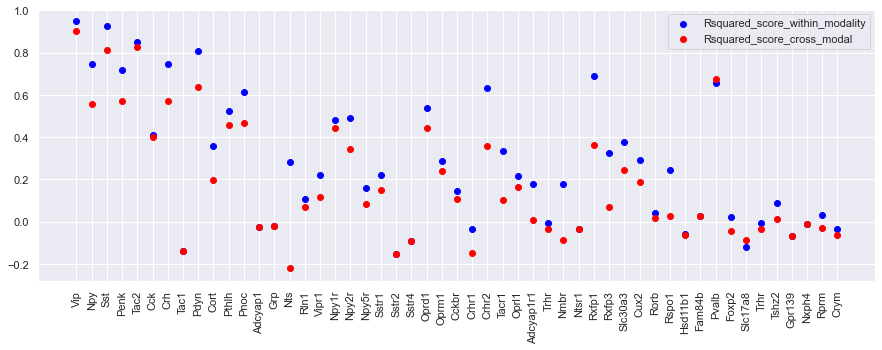

In [37]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.scatter([i for i in range(len(Rsquared_within_modality))], 
            Rsquared_within_modality, 
            c="blue", 
            label="Rsquared_score_within_modality")
plt.scatter([i for i in range(len(Rsquared_crossmodal))], 
            Rsquared_crossmodal,
            c="red", label="Rsquared_score_cross_modal")
plt.xticks(ticks =[i for i in range(len(NPP_genes + EXC_genes))],
           labels = NPP_genes + EXC_genes, rotation=90)
plt.legend()
plt.show()

# EXC patchseq

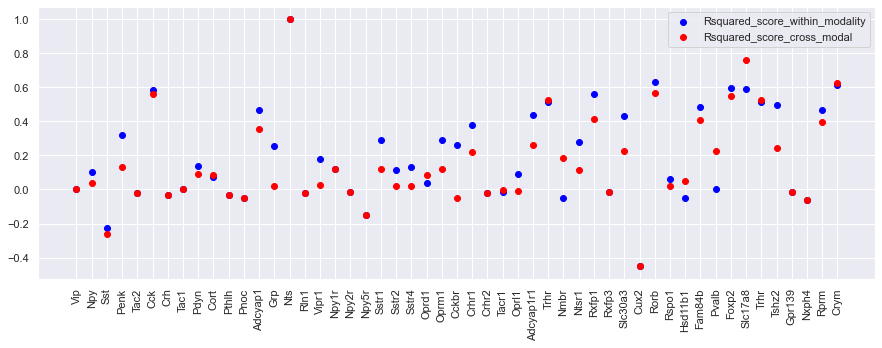

In [18]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.scatter([i for i in range(len(Rsquared_within_modality))], 
            Rsquared_within_modality, 
            c="blue", 
            label="Rsquared_score_within_modality")
plt.scatter([i for i in range(len(Rsquared_crossmodal))], 
            Rsquared_crossmodal,
            c="red", label="Rsquared_score_cross_modal")
plt.xticks(ticks =[i for i in range(len(NPP_genes + EXC_genes))],
           labels = NPP_genes + EXC_genes, rotation=90)
plt.legend()
plt.show()